### Dataset Information: PJM Hourly Energy Consumption

- **Dataset Name:** PJM Hourly Energy Consumption
- **File Name:** `PJME_hourly.csv`
- **Source:** PJM Interconnection LLC
- **Coverage:** Data from the Eastern Interconnection grid, covering states such as Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and Washington D.C.
- **Time Range:** Over 10 years of hourly data
- **Frequency:** Hourly records
- **Units:** Energy consumption recorded in Megawatts (MW)
- **Columns:**
  - **Datetime:** Timestamp of the observation (YYYY-MM-DD HH:MM:SS)
  - **PJME_MW:** Energy consumption in megawatts for the PJME region

This dataset is useful for building time series models to forecast future energy consumption trends and analyze patterns over time. The time-based nature of the data allows for in-depth exploration of seasonality, trends, and anomalies.

In [114]:
#import paskages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

In [3]:
plt.style.use("ggplot")

# Explore Data

In [5]:
#load data
data=pd.read_csv("dataset/PJME_hourly.csv")

In [6]:
#head data 
data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [7]:
#last data 
data.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [8]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [10]:
#set index to column "Datetime"
data.set_index("Datetime",inplace=True)

In [21]:
# Convert  index to datetime type
data.index = pd.to_datetime(data.index)

In [12]:
#check for data
data.head(2)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0


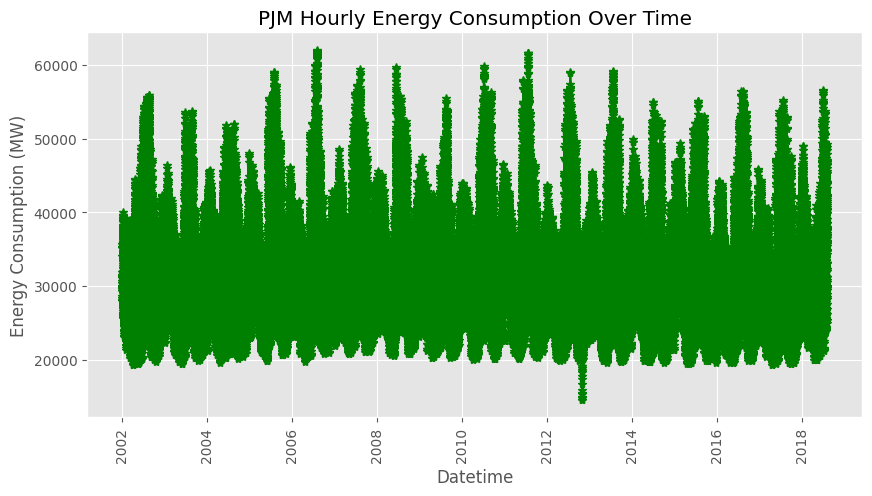

In [36]:
# Plot  data
plt.figure(figsize=(10,5))
plt.plot(data.index, data['PJME_MW'], color='green',marker="*")
plt.title('PJM Hourly Energy Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption (MW)')
plt.xticks(rotation=90)
plt.show()

### Feature engineering

###### Add time-based features to the dataset

In [39]:
# Extract hour from  index and 
data['hour'] = data.index.hour

In [40]:
# Extract day of the week from  index and 
data['dayofweek'] = data.index.dayofweek

In [41]:
# Extract month from index 
data['month'] = data.index.month


In [42]:
# Extract quarter from  index a
data['quarter'] = data.index.quarter

In [43]:
# Extract year from  index 
data['year'] = data.index.year


In [44]:
# Extract day of the year from  inde
data['dayofyear'] = data.index.day_of_year

In [46]:
#show data after Feature engineering
data.head()

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,4,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,4,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,4,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,4,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,4,2002,365


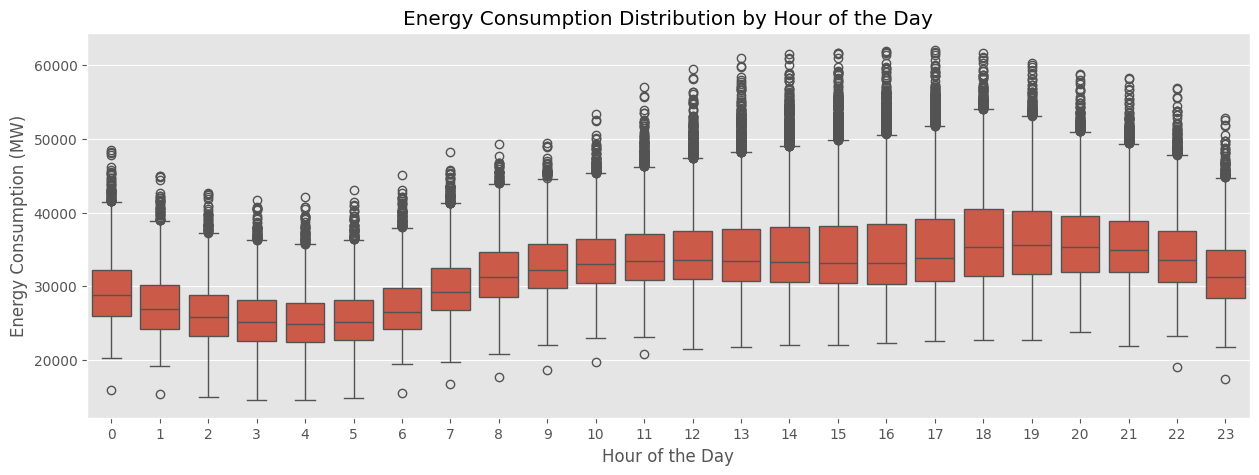

In [54]:
# figure size
plt.figure(figsize=(15, 5))

# box plot to visualize  distribution of energy consumption across different hours
sns.boxplot(data=data, x='hour', y='PJME_MW')

# title and labels
plt.title('Energy Consumption Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (MW)')

# Show plot
plt.show()

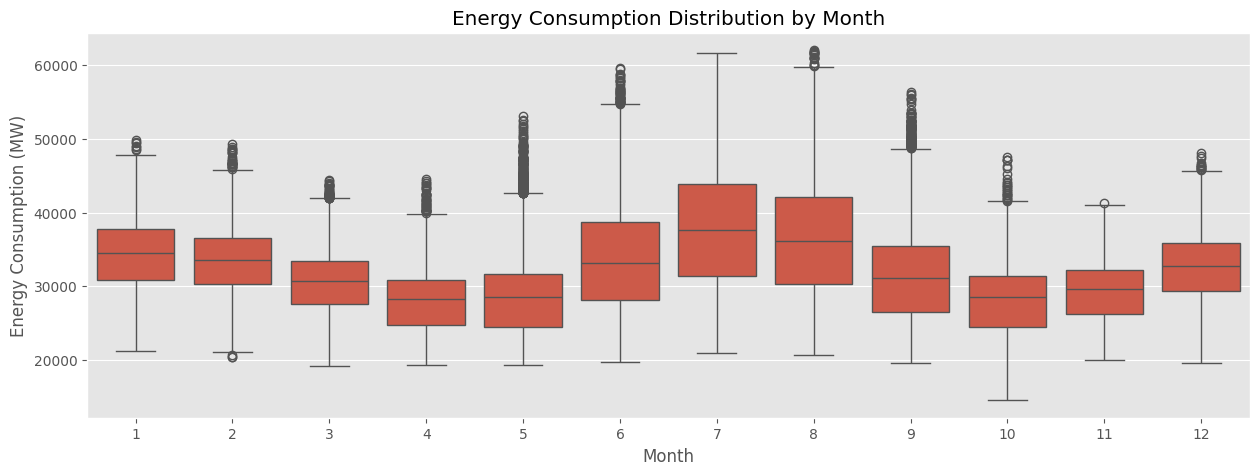

In [56]:
# figure size
plt.figure(figsize=(15, 5))

#  boxplot to visualize  distribution of energy consumption by month
sns.boxplot(data=data, x='month', y='PJME_MW')

#  title and labels
plt.title('Energy Consumption Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (MW)')

# Show plot
plt.show()


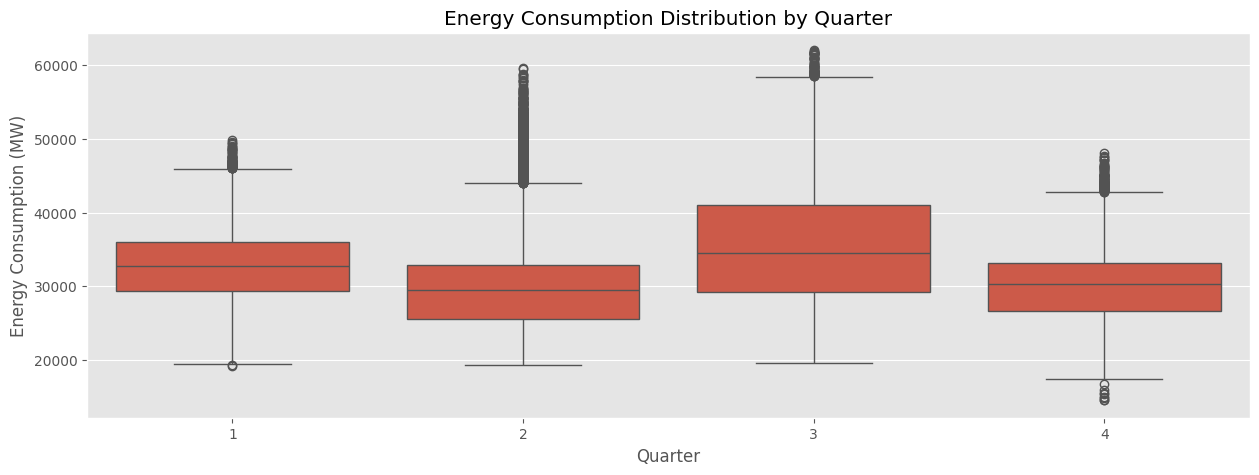

In [57]:
#  figure size
plt.figure(figsize=(15, 5))

#  boxplot to visualize  distribution of energy consumption by quarter
sns.boxplot(data=data, x='quarter', y='PJME_MW')

#  title and labels
plt.title('Energy Consumption Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Energy Consumption (MW)')

# Show the plot
plt.show()


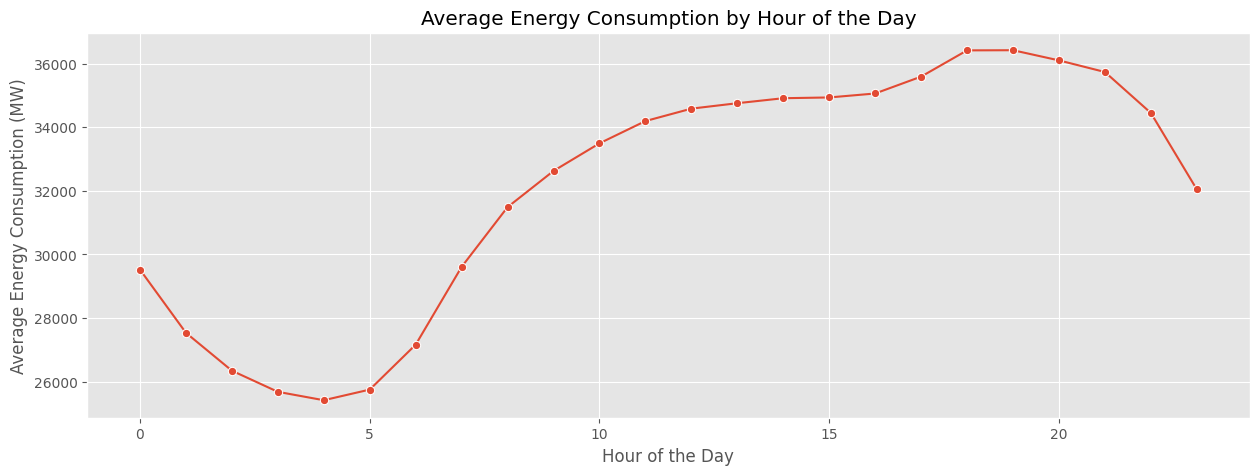

In [59]:
#Energy Consumption by Hour of the Day

#  the figure size
plt.figure(figsize=(15, 5))

# line plot to visualize the average energy consumption by hour of the day
sns.lineplot(data=data.groupby('hour').mean().reset_index(), x='hour', y='PJME_MW', marker='o')

# title and labels
plt.title('Average Energy Consumption by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption (MW)')

# Show  plot
plt.grid(True)
plt.show()


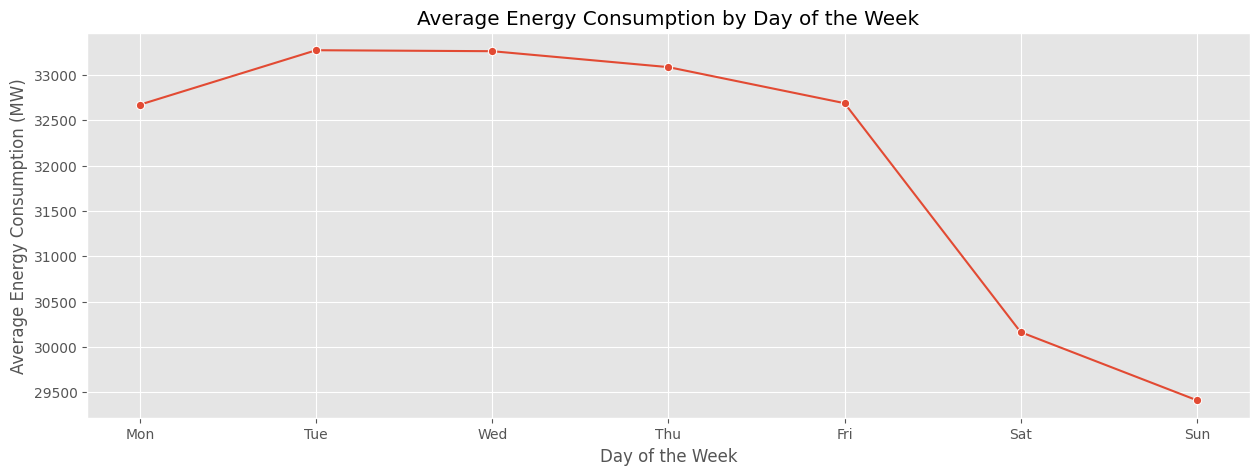

In [62]:
# Energy Consumption by Day of the Week

#  figure size
plt.figure(figsize=(15, 5))

#  line plot to visualize  average energy consumption by day of the week
sns.lineplot(data=data.groupby('dayofweek').mean().reset_index(), x='dayofweek', y='PJME_MW', marker='o')

# Set plot title and labels
plt.title('Average Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Energy Consumption (MW)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Show  plot
plt.grid(True)
plt.show()


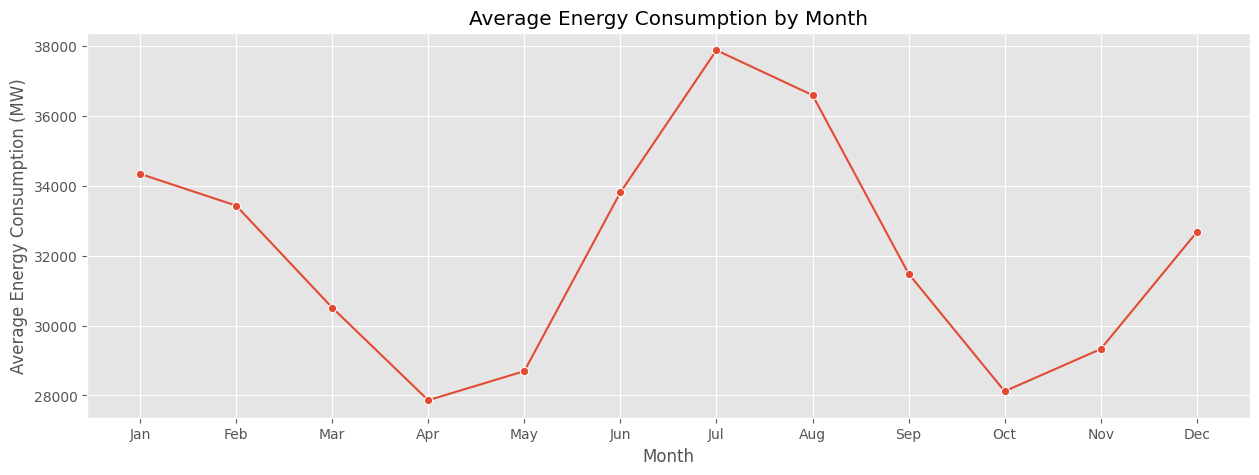

In [63]:
# Energy Consumption by Month


#  figure size
plt.figure(figsize=(15, 5))

#  line plot to visualize the average energy consumption by month
sns.lineplot(data=data.groupby('month').mean().reset_index(), x='month', y='PJME_MW', marker='o')

# Set plot title and labels
plt.title('Average Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (MW)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show  plot
plt.grid(True)
plt.show()


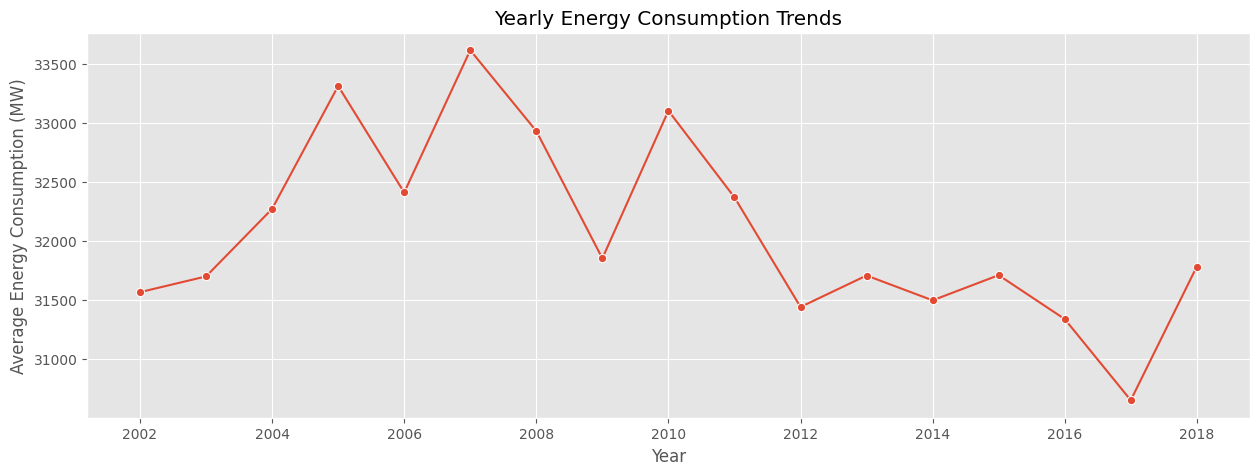

In [64]:
#Energy Consumption Trends Over Years


plt.figure(figsize=(15, 5))

# line plot to visualize the energy consumption trends over the years
data_yearly = data.groupby('year').mean().reset_index()
sns.lineplot(data=data_yearly, x='year', y='PJME_MW', marker='o')

#title and labels
plt.title('Yearly Energy Consumption Trends')
plt.xlabel('Year')
plt.ylabel('Average Energy Consumption (MW)')

# Show  plot
plt.grid(True)
plt.show()

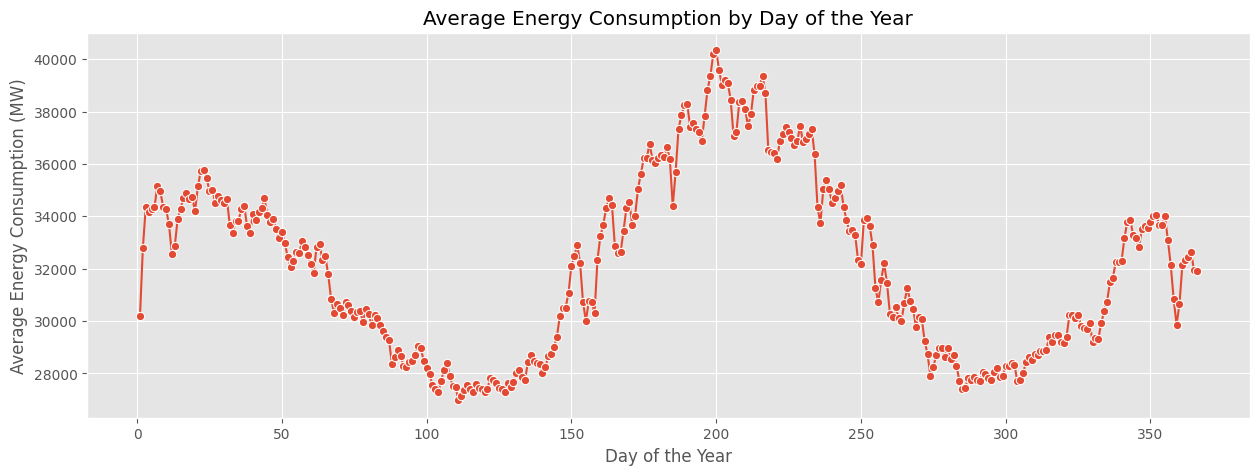

In [65]:
#Energy Consumption by Day of the Year


plt.figure(figsize=(15, 5))

#  line plot to visualize the average energy consumption by day of the year
data_dayofyear = data.groupby('dayofyear').mean().reset_index()
sns.lineplot(data=data_dayofyear, x='dayofyear', y='PJME_MW', marker='o')

#  title and labels
plt.title('Average Energy Consumption by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Energy Consumption (MW)')

# Show  plot
plt.grid(True)
plt.show()


### Modeling 

In [79]:
#split  dataset into training and testing 
training_data = data.loc[data.index < "2015-01-01"]
testing_data = data.loc[data.index >= "2015-01-01"]

In [80]:
# print shape of  training and testing data
print("Training data shape:", training_data.shape)
print("Testing data shape:", testing_data.shape)

Training data shape: (113926, 7)
Testing data shape: (31440, 7)


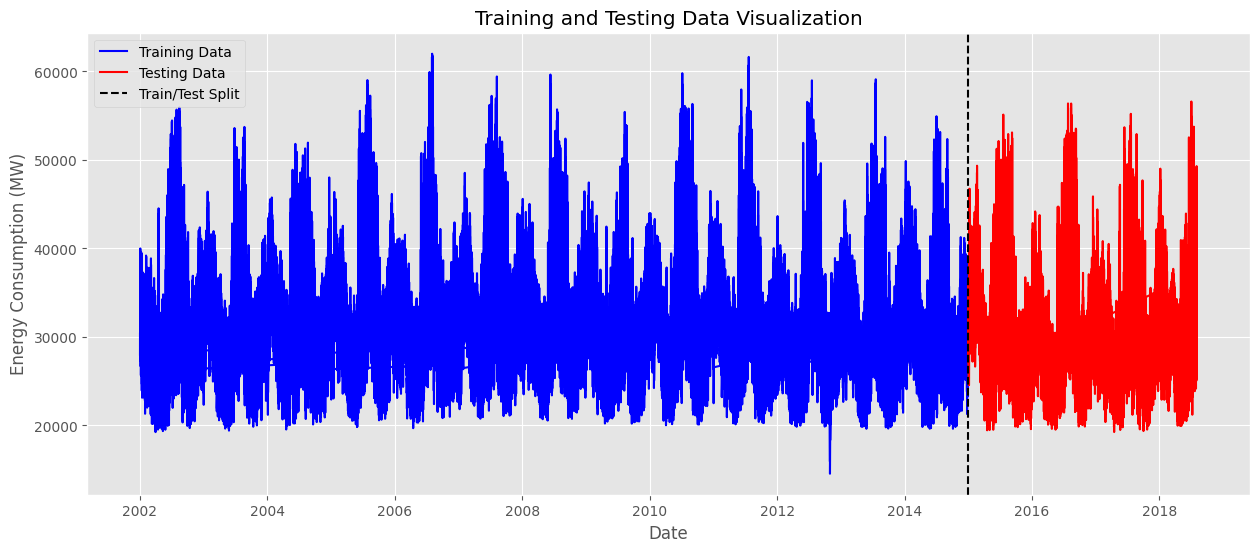

In [94]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Plot training data with a label
ax.plot(training_data.index, training_data['PJME_MW'], label='Training Data', color='blue')

# Plot testing data with a label
ax.plot(testing_data.index, testing_data['PJME_MW'], label='Testing Data', color='red')

ax.axvline(pd.to_datetime("2015-01-01") , color="Black" , linestyle='--',label="Train/Test Split")
# Set title and labels
ax.set_title("Training and Testing Data Visualization")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption (MW)")

ax.legend()

# Show  plot
plt.show()


In [97]:
#split  data into training and testing sets for  time series
x_train=training_data.drop('PJME_MW', axis=1)
y_train=training_data['PJME_MW']

x_test=testing_data.drop('PJME_MW',axis=1)
y_test=testing_data['PJME_MW']

In [99]:
# Check the shapes ts
print(f"Training set features shape: {x_train.shape}")
print(f"Testing set features shape: {x_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (113926, 6)
Testing set features shape: (31440, 6)
Training set target shape: (113926,)
Testing set target shape: (31440,)


In [115]:
# Define  parameter grid
param_grid = {
    'n_estimators': [100, 1000],
    'learning_rate': [0.01,  0.1, 0.2],
    'gamma': [0, 0.1, 1],
}

In [117]:
# create model XGBRFRegressor
model_XGBR=XGBRFRegressor()

In [118]:
#randomized search
random_s = RandomizedSearchCV(
    estimator=model_XGBR,
    param_distributions=param_grid,
    n_iter=5,
    cv=5   ,
    n_jobs=-1
                    )

In [120]:
# Fit  random search model

random_s.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=Non...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:squarederror',
                                            predictor=None, random_state=None,
                                            reg_alpha=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 1],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'n_estimators': [100, 1000]})

In [121]:
# Get  best parameters 
best_para = random_s.best_params_


In [123]:
# Get  best score 
best_score  = np.sqrt(-random_s.best_score_)


In [125]:
print(f"Best Hyperparameters: {best_para}")

Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 0.2, 'gamma': 0}


In [126]:
print(f"Best RMSE Score: {best_score}")


Best RMSE Score: 3.9799124062248885


In [127]:
# Get  best estimator
best_model = random_s.best_estimator_

In [128]:
#  predictions
prediction = best_model.predict(x_test)

###### Evaluate the model


In [131]:
mse = mean_squared_error(y_test, prediction)


In [132]:
rmse = np.sqrt(mse)


In [133]:
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 649830558.402278


In [134]:
print(f"Root Mean Squared Error on Test Set: {rmse}")

Root Mean Squared Error on Test Set: 25491.774328247102
